# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [19]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random
import cv2
import time
from tqdm import tqdm
%matplotlib inline

In [21]:
# Load pickled data
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# Number of training examples
n_train = np.shape(X_train)[0]

# Number of validation examples
n_validation = np.shape(X_valid)[0]

# Number of testing examples.
n_test = np.shape(X_test)[0]

# What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:]

# How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
df = pd.read_csv('signnames.csv')
df.head(5)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [6]:
df.tail(5)

,ClassId,SignName
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vehicles over 3.5 metric ...


### Plot sample train and test images along with labels

In [6]:
### Data exploration visualization

# plot random images and labels
def plot_sample_data(X, y, output_name):
    indices = np.random.randint(0, len(X), 25)
    images = X[indices]
    labels = y[indices]

    f, axs = plt.subplots(5,5, figsize=(20,20))
    axs = np.array(axs).reshape(-1)
    f.tight_layout()
    for i in range(len(images)):
        label = labels[i]
        axs[i].imshow(images[i])
        axs[i].axis('off')
        axs[i].set_title(str(label)+','+df.iloc[label,1])
    f.savefig('output_images/sample_' + output_name + '_data.png', bbox_inches='tight', pad_inches=0)

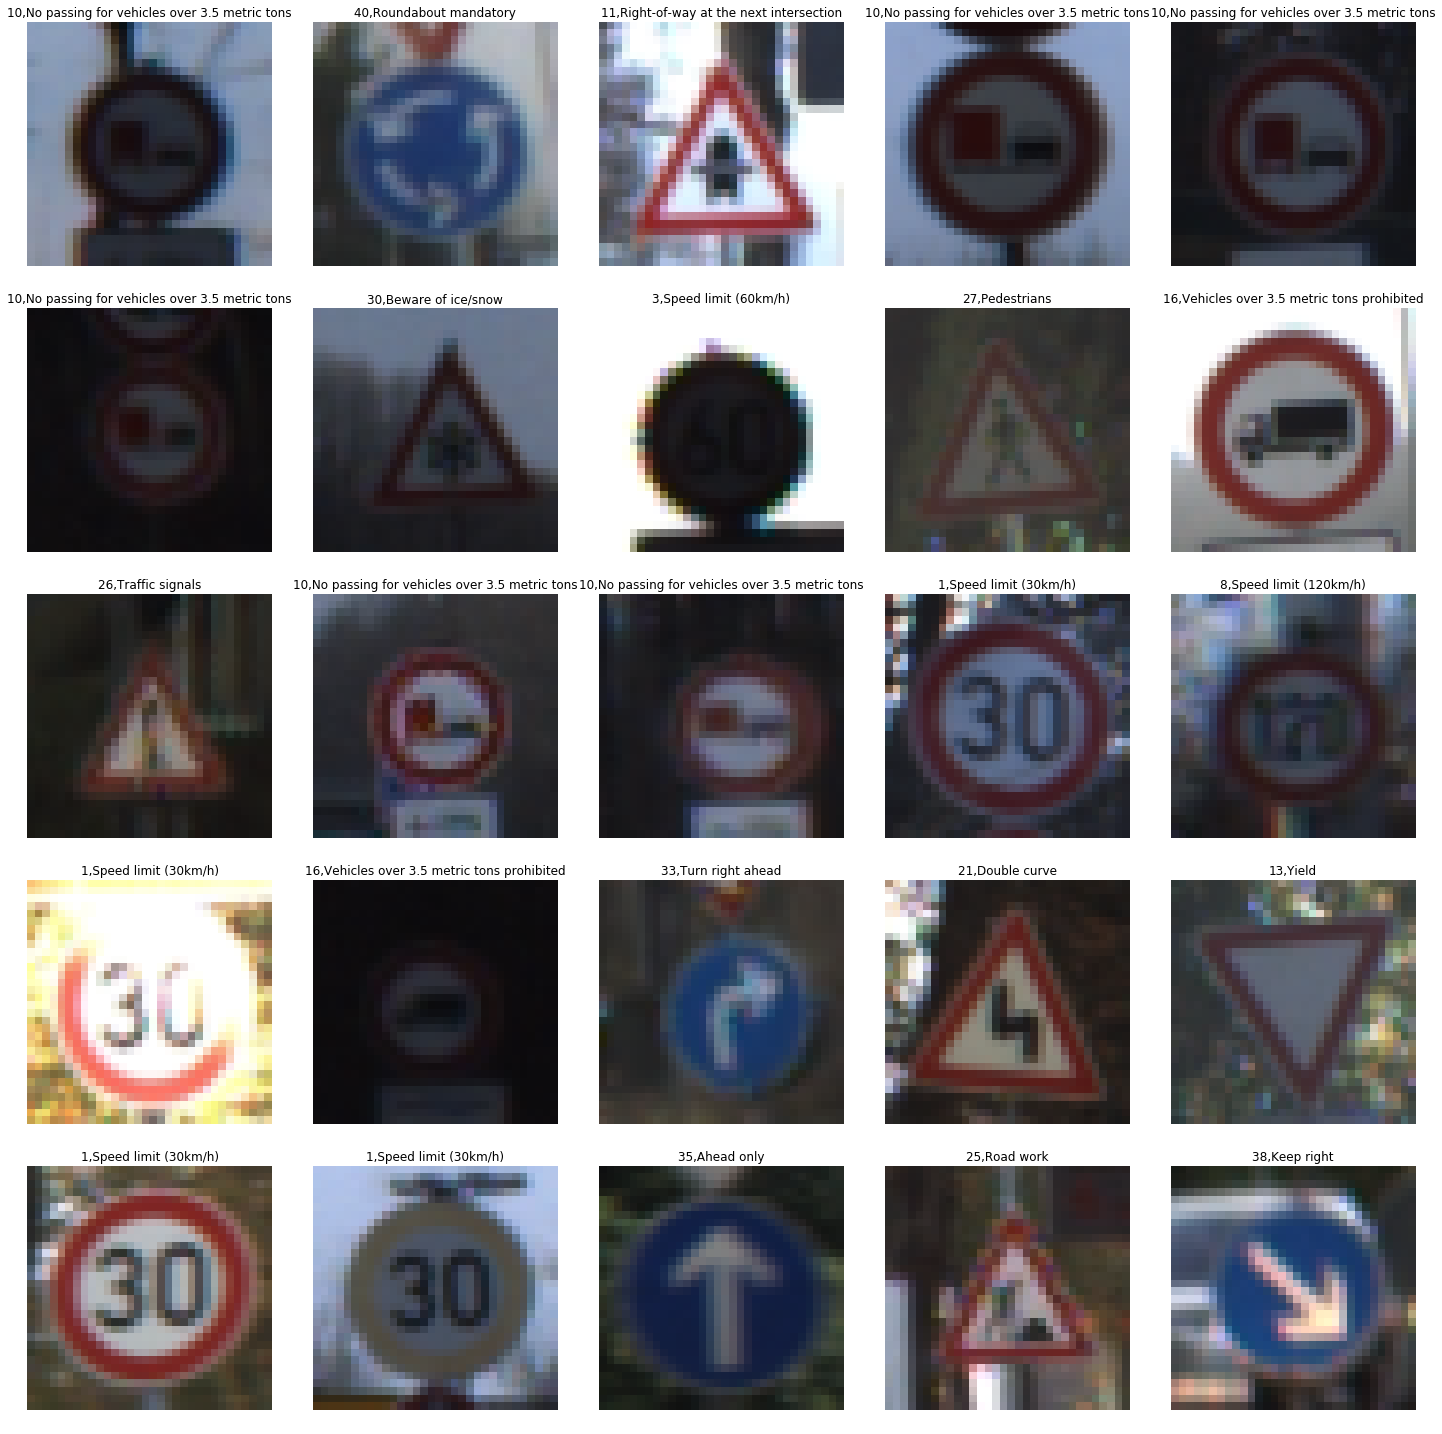

In [141]:
# plot a sample of train data
plot_sample_data(X_train, y_train, 'train')

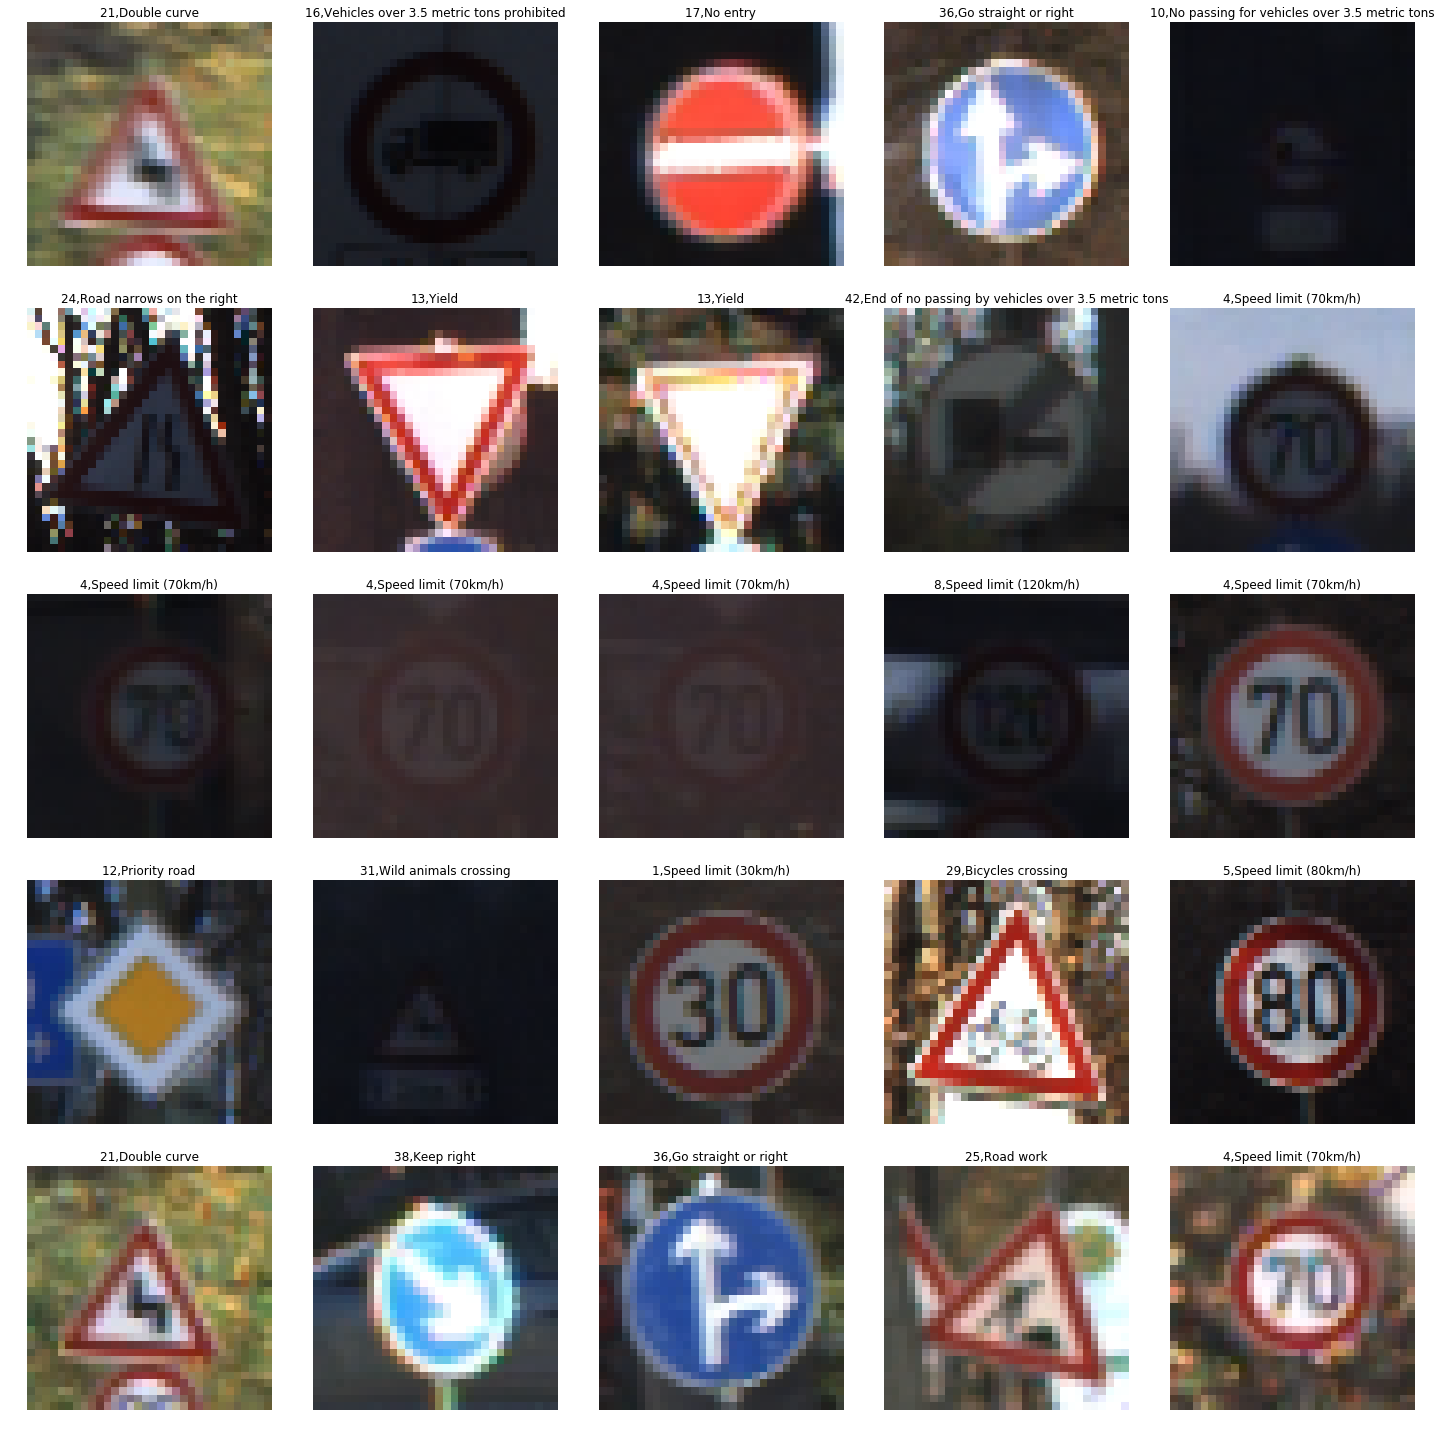

In [142]:
# plot a sample of test data
plot_sample_data(X_test, y_test, 'test')

### Plot distribution of data

In [25]:
# plot distributon of data

def plot_dist(y):
    freq = np.bincount(y_train)
    x = np.arange(len(freq))
    plt.figure(figsize=(10,5))
    plt.bar(x, freq)
    plt.savefig('output_images/dist.png', bbox_inches='tight', pad_inches=0)

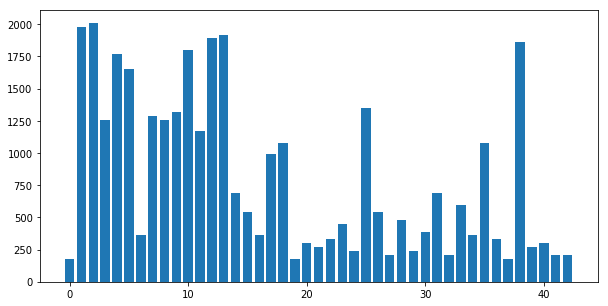

In [26]:
plot_dist(y_train)

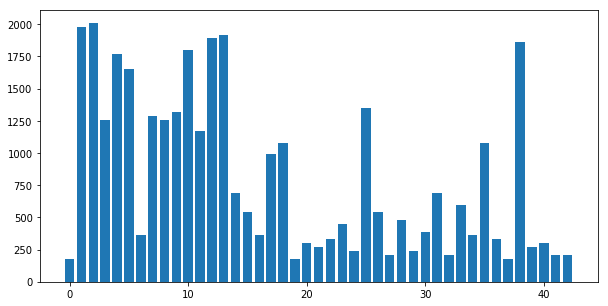

In [162]:
plot_dist(y_test)

We note that both the training and the test data is from the same distribution

### Traffic sign labels in decreasing order of frequency in dataset

In [175]:
# signs in the decreasing order of frequency
freq = np.bincount(y_train)
# freq_idx_sorted = np.argsort(freq)[::-1]
df['freq'] = freq
df.sort_values(by='freq', ascending=False)

,ClassId,SignName,freq
2,2,Speed limit (50km/h),2010
1,1,Speed limit (30km/h),1980
13,13,Yield,1920
12,12,Priority road,1890
38,38,Keep right,1860
10,10,No passing for vehicles over 3.5 metric tons,1800
4,4,Speed limit (70km/h),1770
5,5,Speed limit (80km/h),1650
25,25,Road work,1350
9,9,No passing,1320


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Data augmentation

In [26]:
def random_translation(img, rng=(-5, 5)):
    h,w,_ = img.shape
    tx = np.random.uniform(rng[0], rng[1])
    ty = np.random.uniform(rng[0], rng[1])
    M = np.float32([[1,0,tx],[0,1,ty]])
    return cv2.warpAffine(img, M, (w, h))

def random_rotation(img, rng=(-20, 20)):
    h,w,_ = img.shape
    theta = np.random.uniform(rng[0], rng[1])
    M = cv2.getRotationMatrix2D((w/2,h/2), theta, 1)
    return cv2.warpAffine(img, M, (w, h))

def random_shear(img, rng=(-0.2, 0.2)):
    h,w,_ = img.shape
    shy = np.random.uniform(rng[0], rng[1])
    shx = np.random.uniform(rng[0], rng[1])
    M = np.float32([[1, shy, 0], [shx, 1, 0]])
    return cv2.warpAffine(img, M, (w, h))

def random_brightness(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    brightness = np.random.uniform(0.25, 1.1)
#     print(brightness)
    img_hsv[:,:,2] = img_hsv[:,:,2] * brightness
    img_hsv[:,:,2][img_hsv[:,:,2]>255] = 255 # cap the V channel
    return cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

In [27]:
def generate_jittered_img(img):
    img = random_translation(img)
    img = random_rotation(img)
    img = random_shear(img)
    img = random_brightness(img)
    
    return img

0


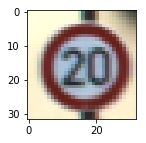

In [28]:
index = np.where(y_train==0)[0][2]
image = X_train[index]
plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

### Plot sample of augmented data

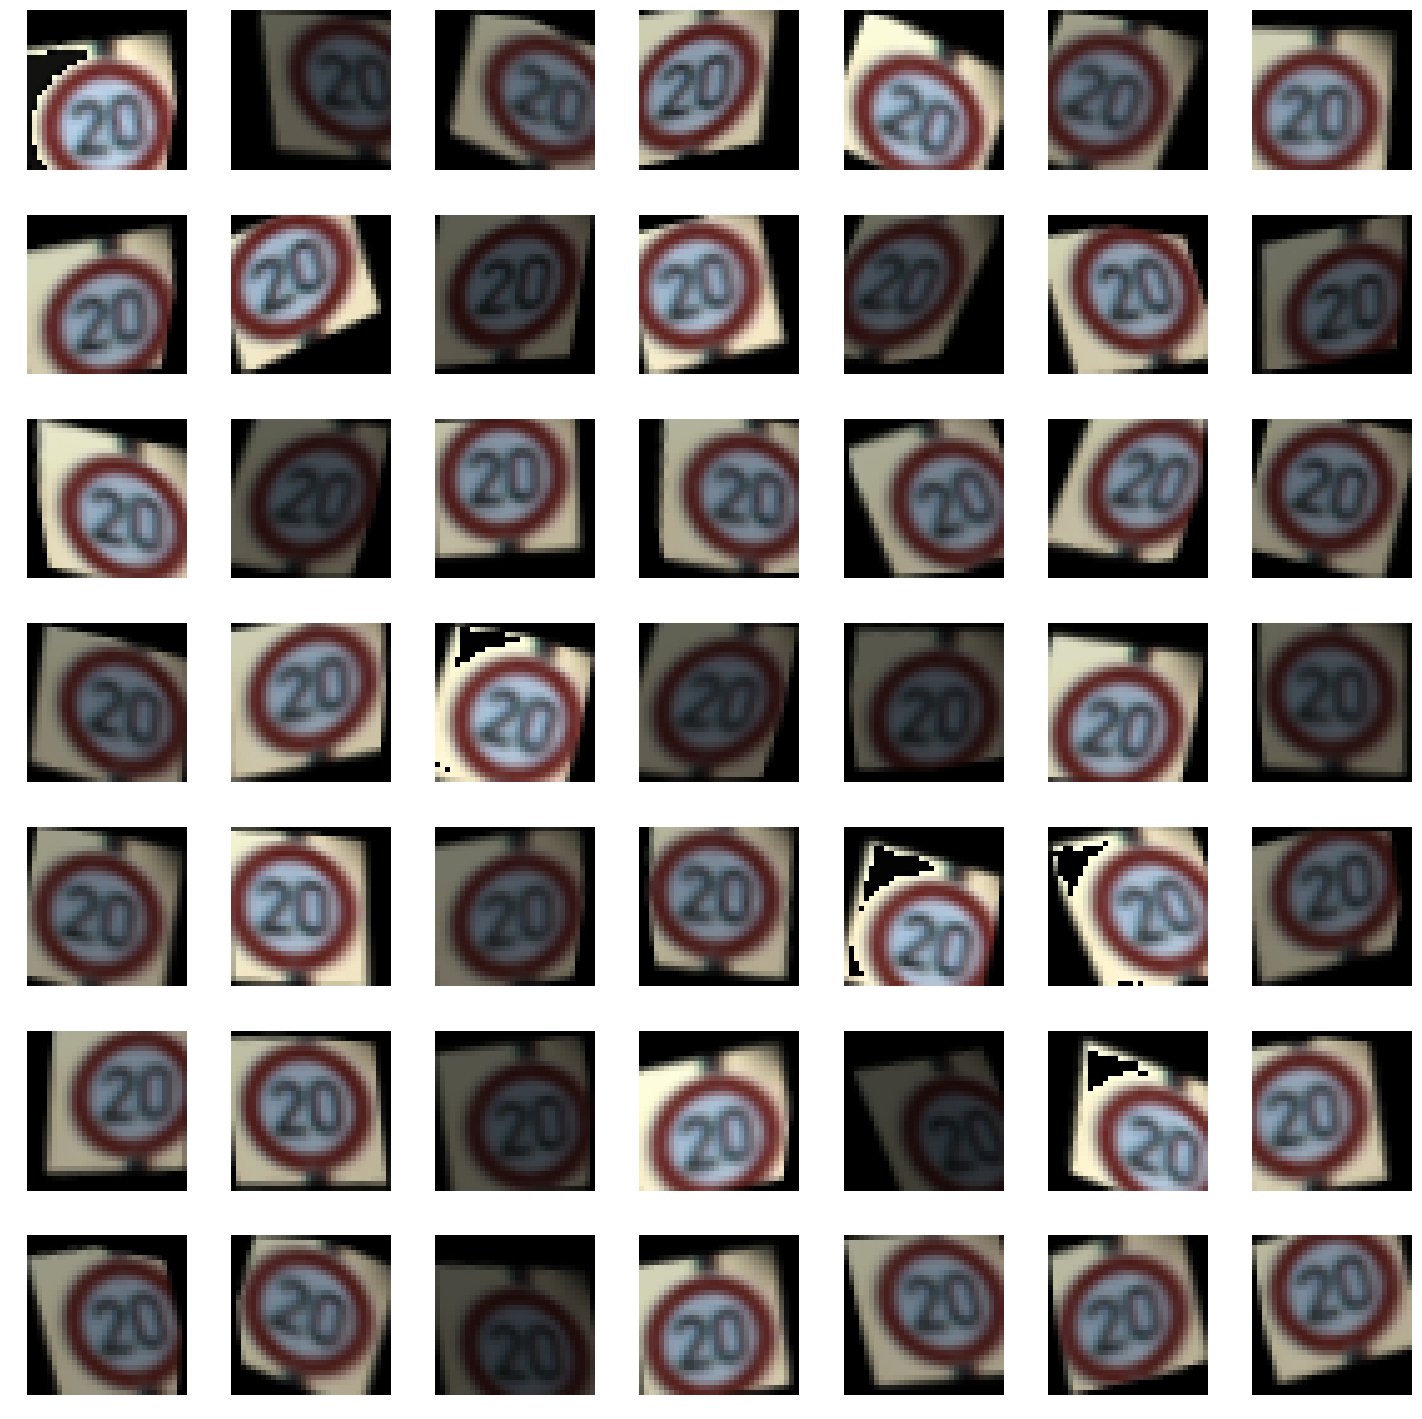

In [29]:
f, axs = plt.subplots(7,7, figsize=(20,20))
axs = np.array(axs).reshape(-1)
f.tight_layout()
for i in range(49):
    axs[i].imshow(generate_jittered_img(image))
    axs[i].axis('off')
f.savefig('output_images/data_augmentation.png', bbox_inches='tight', pad_inches=0)

### Preprocessing

In [30]:
# convert to grayscale (http://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html)
# make sure to return shape as (n_images, 32, 32, 1)
def to_grayscale(x):
    return np.dot(x, [0.299,0.587,0.114])[..., None]
    
# normalization between -1 to 1
def normalize(x):
    return (x - 128.0)/128.0

def preprocess(x):
    x = to_grayscale(x)
    x = normalize(x)
    return x

In [31]:
# for each image in X, augments n_each images and returns the original+augmented dataset
def augment_data(X, y, n_each=4):
    X_result = []
    n = X.shape[0]
    print('starting with ',n,' samples')
    for i in tqdm(range(n)):
        X_result.append(X[i])
        for j in range(n_each):
            img_augmented = generate_jittered_img(X[i])
            X_result.append(img_augmented)
    
    X_result = preprocess(X_result)
    y_result = np.repeat(y, n_each+1)
    print('returning ', len(X_result), y_result.shape, ' samples')
    return X_result, y_result
        

In [32]:
X_train, y_train = augment_data(X_train, y_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

starting with  34799  samples



 37%|███████████████████████████▎                                              | 12816/34799 [00:06<00:13, 1598.35it/s]


 75%|███████████████████████████████████████████████████████▎                  | 26007/34799 [00:14<00:04, 2004.11it/s]


100%|██████████████████████████████████████████████████████████████████████████| 34799/34799 [00:18<00:00, 1842.68it/s]

returning  173995 (173995,)  samples


In [33]:
# shuffle the data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [34]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def model(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    # Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)
    # Layer 1: Pooling. Input = 32x32x16. Output = 16x16x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # Layer 1: Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Layer 2: Convolutional. Output = 16x16x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    # Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)
    # Layer 2: Pooling. Input = 16x16x32. Output = 8x8x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # Layer 2: Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Layer 3: Convolutional. Output = 8x8x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    # Layer 3: Activation.
    conv3 = tf.nn.relu(conv3)
    # Layer 3: Pooling. Input = 8x8x64. Output = 4x4x64.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # Layer 3: Dropout
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    # Flatten. Input = [(16x16x16), (8x8x32), (4x4x64)]. Output = 7168.
    fc0   = tf.concat(1, [flatten(conv1), flatten(conv2), flatten(conv3)])
    
    # Layer 4: Fully Connected. Input = 7168. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(7168, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # Layer 4: Activation.
    fc1    = tf.nn.relu(fc1)
    # Layer 4: Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 5: Fully Connected. Input = 512. Output = 256.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # Layer 5: Activation.
    fc2    = tf.nn.relu(fc2)
    # Layer 5: Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 6: Fully Connected. Input = 256. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [35]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

In [36]:
# placeholders for features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

In [39]:
# training pipeline
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

logits = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [40]:
# model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    start = time.time()
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    print('evaluated in ',time.time()-start,'s')
    return (total_accuracy / num_examples), (total_loss / num_examples)

In [41]:
# train the model and evaluate validation accuracy
model_path = 'model5_0.6_sh_passthru/'
validation_accuracy = []
training_accuracy = []
validation_loss = []
training_loss = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        start = time.time()
        bar = tqdm(total=num_examples // BATCH_SIZE)
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            bar.update(1)
        
        valid_acc, valid_loss = evaluate(X_valid, y_valid)
        train_acc, train_loss = evaluate(X_train, y_train)
        validation_accuracy.append(valid_acc)
        validation_loss.append(valid_loss)
        training_accuracy.append(train_acc)
        training_loss.append(train_loss)
        print("EPOCH {} t={}...".format(i+1, time.time() - start))
        print("Validation Accuracy = {:.3f}".format(valid_acc))
        print("Training Accuracy = {:.3f}".format(train_acc))
        print("Validation Loss = {:.3f}".format(valid_loss))
        print("Training Loss = {:.3f}".format(train_loss))
        bar.close()
        print()
        
    saver.save(sess, model_path+'traffic')
    print("Model saved")

Training...




  0%|                                                                                         | 0/1359 [00:00<?, ?it/s]
1360it [07:13,  2.38it/s]                                                                                              

evaluated in  13.466505527496338 s
evaluated in  532.0835766792297 s
EPOCH 1 t=979.3283643722534...
Validation Accuracy = 0.533
Training Accuracy = 0.317
Validation Loss = 1.596
Training Loss = 2.377


1360it [11:35,  2.39it/s]                                                                                              

evaluated in  13.355426788330078 s
evaluated in  524.3381090164185 s
EPOCH 2 t=1233.1164073944092...
Validation Accuracy = 0.744
Training Accuracy = 0.493
Validation Loss = 0.836
Training Loss = 1.670


1360it [11:47,  2.30it/s]                                                                                              

evaluated in  13.687659978866577 s
evaluated in  528.8592991828918 s
EPOCH 3 t=1250.5126876831055...
Validation Accuracy = 0.812
Training Accuracy = 0.639
Validation Loss = 0.564
Training Loss = 1.184


1360it [11:48,  2.32it/s]                                                                                              

evaluated in  13.470507144927979 s
evaluated in  532.010014295578 s
EPOCH 4 t=1253.8218343257904...
Validation Accuracy = 0.846
Training Accuracy = 0.629
Validation Loss = 0.499
Training Loss = 1.198


1360it [11:50,  2.47it/s]                                                                                              

evaluated in  12.900103330612183 s
evaluated in  530.50248503685 s
EPOCH 5 t=1253.7573363780975...
Validation Accuracy = 0.883
Training Accuracy = 0.727
Validation Loss = 0.383
Training Loss = 0.925


1360it [11:48,  2.27it/s]                                                                                              

evaluated in  13.697226524353027 s
evaluated in  532.4951586723328 s
EPOCH 6 t=1255.05055809021...
Validation Accuracy = 0.888
Training Accuracy = 0.772
Validation Loss = 0.343
Training Loss = 0.757


1360it [11:45,  2.24it/s]                                                                                              

evaluated in  13.848772287368774 s
evaluated in  533.6304879188538 s
EPOCH 7 t=1252.8663411140442...
Validation Accuracy = 0.895
Training Accuracy = 0.774
Validation Loss = 0.331
Training Loss = 0.744


1360it [12:11,  2.47it/s]                                                                                              

evaluated in  13.098246097564697 s
evaluated in  549.4880316257477 s
EPOCH 8 t=1293.790655374527...
Validation Accuracy = 0.902
Training Accuracy = 0.807
Validation Loss = 0.304
Training Loss = 0.652


1360it [12:36,  2.30it/s]                                                                                              

evaluated in  13.98387098312378 s
evaluated in  573.1963171958923 s
EPOCH 9 t=1343.4965679645538...
Validation Accuracy = 0.913
Training Accuracy = 0.827
Validation Loss = 0.262
Training Loss = 0.611


1360it [11:55,  2.32it/s]                                                                                              

evaluated in  13.364432334899902 s
evaluated in  519.664222240448 s
EPOCH 10 t=1248.9325881004333...
Validation Accuracy = 0.918
Training Accuracy = 0.813
Validation Loss = 0.284
Training Loss = 0.661


1360it [11:44,  2.45it/s]                                                                                              

evaluated in  12.912113666534424 s
evaluated in  524.2745409011841 s
EPOCH 11 t=1242.1753273010254...
Validation Accuracy = 0.926
Training Accuracy = 0.875
Validation Loss = 0.246
Training Loss = 0.452


1360it [11:44,  2.25it/s]                                                                                              

evaluated in  13.688660383224487 s
evaluated in  523.2981617450714 s
EPOCH 12 t=1241.6594219207764...
Validation Accuracy = 0.909
Training Accuracy = 0.876
Validation Loss = 0.290
Training Loss = 0.439


1360it [11:54,  2.09it/s]                                                                                              

evaluated in  13.927840232849121 s
evaluated in  519.0923893451691 s
EPOCH 13 t=1247.9137182235718...
Validation Accuracy = 0.920
Training Accuracy = 0.891
Validation Loss = 0.256
Training Loss = 0.400


1360it [11:38,  2.34it/s]                                                                                              

evaluated in  13.17930269241333 s
evaluated in  524.2085995674133 s
EPOCH 14 t=1235.6959509849548...
Validation Accuracy = 0.923
Training Accuracy = 0.851
Validation Loss = 0.260
Training Loss = 0.545


1360it [11:41,  2.42it/s]                                                                                              

evaluated in  13.252354383468628 s
evaluated in  520.4628140926361 s
EPOCH 15 t=1235.6213631629944...
Validation Accuracy = 0.907
Training Accuracy = 0.830
Validation Loss = 0.296
Training Loss = 0.611


1360it [11:46,  2.52it/s]                                                                                              

evaluated in  12.828598976135254 s
evaluated in  524.2486531734467 s
EPOCH 16 t=1243.9084556102753...
Validation Accuracy = 0.930
Training Accuracy = 0.907
Validation Loss = 0.218
Training Loss = 0.338


1360it [11:47,  2.56it/s]                                                                                              

evaluated in  12.238635063171387 s
evaluated in  523.1568439006805 s
EPOCH 17 t=1242.559051990509...
Validation Accuracy = 0.934
Training Accuracy = 0.910
Validation Loss = 0.201
Training Loss = 0.350


1360it [11:37,  2.53it/s]                                                                                              

evaluated in  12.513833284378052 s
evaluated in  527.2759478092194 s
EPOCH 18 t=1236.823394536972...
Validation Accuracy = 0.928
Training Accuracy = 0.856
Validation Loss = 0.233
Training Loss = 0.519


1360it [08:56,  4.22it/s]                                                                                              

evaluated in  6.855610370635986 s
evaluated in  287.939740896225 s
EPOCH 19 t=831.3662641048431...
Validation Accuracy = 0.923
Training Accuracy = 0.902
Validation Loss = 0.242
Training Loss = 0.376


1360it [06:22,  4.15it/s]                                                                                              

evaluated in  7.332175970077515 s
evaluated in  287.8991413116455 s
EPOCH 20 t=677.5940511226654...
Validation Accuracy = 0.931
Training Accuracy = 0.918
Validation Loss = 0.216
Training Loss = 0.309



Model saved


### Plot loss and accuracy over epochs

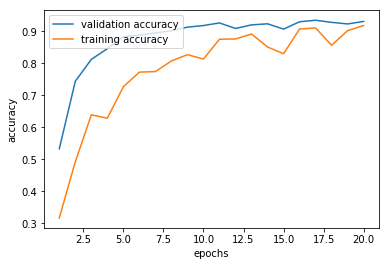

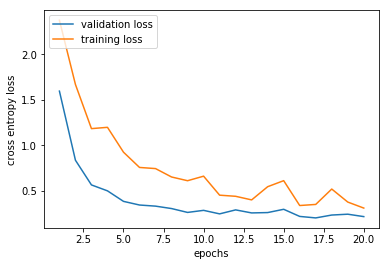

In [42]:
# plot loss and accuracy over epochs
# print(validation_accuracy)
# print(training_accuracy)
# print(validation_loss)
# print(training_loss)

e = list(range(1,EPOCHS+1))
plt.plot(e, validation_accuracy, e, training_accuracy)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['validation accuracy', 'training accuracy'], loc='upper left')
plt.savefig(model_path+'accuracy.png')
plt.show()

plt.plot(e, validation_loss, e, training_loss)
plt.ylabel('cross entropy loss')
plt.xlabel('epochs')
plt.legend(['validation loss', 'training loss'], loc='upper left')
plt.savefig(model_path+'loss.png')
plt.show()

### Evaluate model on test set

In [44]:
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_path=model_path+'traffic')

    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

evaluated in  22.13762617111206 s
Test Accuracy = 0.919


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [46]:
## load images
images = glob.glob('test_images/*')
print(images)
y_new = [1,2,3,28,25,8,33,13]

['test_images\\30-1.jpg', 'test_images\\50-2.jpg', 'test_images\\60-3.jpg', 'test_images\\children-crossing-28.jpg', 'test_images\\road-work-25.jpg', 'test_images\\speed-limit-120-8.jpg', 'test_images\\turn-right-33.jpg', 'test_images\\yield-13.jpg']


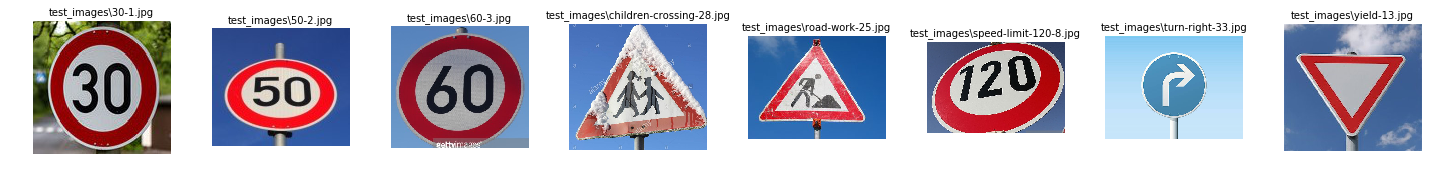

In [47]:
# plot them
f, axs = plt.subplots(1, len(images), figsize=(20,10))
f.tight_layout()
for i, fname in enumerate(images):
    img = mpimg.imread(fname)
    
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(fname, fontsize=10)

### Predict the Sign Type for Each Image

In [48]:
# resize and preprocess the images

X_new = []
for i, fname in enumerate(images):
    img = mpimg.imread(fname)
    img = cv2.resize(img, (32, 32))
    X_new.append(img)
    
X_new = preprocess(X_new)

### Analyze Performance

In [49]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_path=model_path+'traffic')

    test_accuracy, loss = evaluate(X_new, y_new)
    print("Accuracy on new images = {:.3f}".format(test_accuracy))

evaluated in  0.05203747749328613 s
Accuracy on new images = 0.500


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [51]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
k=5
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=k)
with tf.Session() as sess:
    saver.restore(sess, save_path=model_path+'traffic')
    top5 = sess.run(top_k, feed_dict={x: X_new, y: y_new, keep_prob: 1.0})


In [52]:
top5

TopKV2(values=array([[  2.21172750e-01,   9.78222638e-02,   8.87085199e-02,
          6.35863915e-02,   6.05090298e-02],
       [  8.33388716e-02,   7.26170838e-02,   6.68346658e-02,
          6.42561689e-02,   6.32318929e-02],
       [  2.33054489e-01,   1.19291760e-01,   9.99799967e-02,
          7.13467672e-02,   5.17622381e-02],
       [  3.66417944e-01,   1.93967760e-01,   1.84599489e-01,
          7.29509071e-02,   5.01622856e-02],
       [  6.27446830e-01,   1.05518959e-01,   7.46235475e-02,
          4.39456291e-02,   4.19146009e-02],
       [  2.87696600e-01,   2.70272076e-01,   1.82635278e-01,
          3.25280502e-02,   2.78687254e-02],
       [  6.61322951e-01,   2.45161325e-01,   7.58606866e-02,
          1.06951836e-02,   2.93480535e-03],
       [  9.99999881e-01,   8.19570829e-08,   7.21062710e-10,
          4.80577592e-11,   2.07100708e-11]], dtype=float32), indices=array([[ 1,  4, 25, 35, 28],
       [37, 25, 12,  1,  2],
       [ 1, 35, 37, 25,  4],
       [25, 24, 11

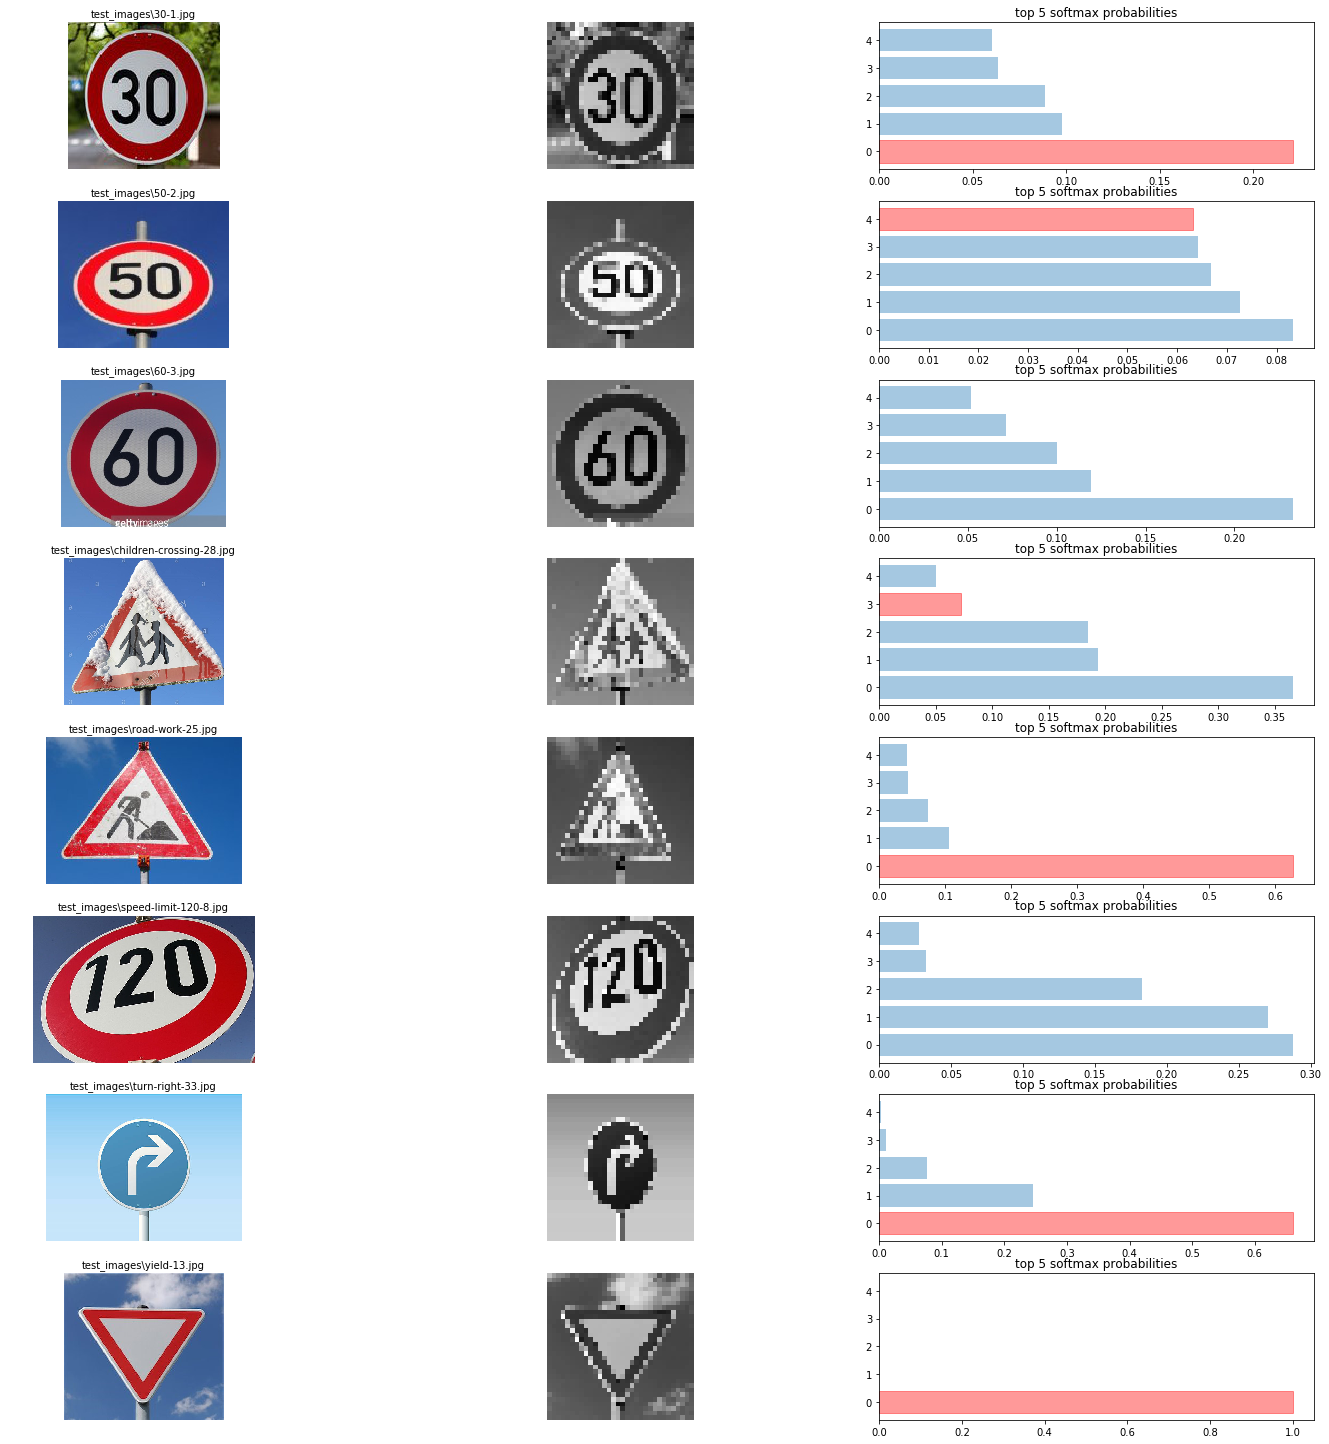

In [53]:
f, axs = plt.subplots(len(images), 3, figsize=(20,20))
f.tight_layout()
y_pos = np.arange(k)
for i, fname in enumerate(images):
    img = mpimg.imread(fname)
    axs[i,0].imshow(img)
    axs[i,0].axis('off')
    axs[i,0].set_title(fname, fontsize=10)
    
    axs[i,1].imshow(X_new[i].squeeze(), cmap='gray')
    axs[i,1].axis('off')
    
    bar = axs[i,2].barh(y_pos, top5[0][i], align='center', alpha=0.4)
    idx = np.where(top5[1][i]==y_new[i])[0]
    if (len(idx) > 0 and idx[0] < y_pos.size): bar[idx[0]].set_color('r')
#     axs[i,2].yticks(y_pos, signs)
    axs[i,2].set_title('top 5 softmax probabilities')
# f.savefig('output_images/top5.png', bbox_inches='tight', pad_inches=0)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")